# Capstone Project ALY6140:

For my final project I decided to go with a topic that I am very passionate about. I am a Biomedical Engineer and physiological conditions were part of my studies.  I also have a personal attachement to this because I have lost members of my family to heart conditions.  I had seen a plethora of datasets before this one but none catched my eye.  

## The Data Set: 
This is a widely used dataset, mainly because the University of California Irvine's department of Machine Learning made it public in their data [repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease "Heart Disease Data Set") and since it has been used in many occasions. [downloaded from](https://www.kaggle.com/ronitf/heart-disease-uci "Kaggle Dataset")

The dataset has a total of 14 attributes that contribute to determining if the patient has or does not have a heart condition. 

Attributes: 

1. Age : Age of Patient in years. 
2. Sex 
    * Male = 1
    * Female = 0
3. CP : Chest Pain Type:
    * Typical Angina = 1
    * Atypical Angina = 2
    * Non-Anginal Pain = 3
    * Asymptomatic = 4
4. TRESTBPS : Resting Blood Pressure (in mmHg on admission to the hospital)
5. CHOL : Serum Cholestoral in mg/dl
6. FBS : Fasting Blood Sugar \> 120 mg/dl
    * True = 1
    * False = 0
7. RESTECG : Resting Electrocardiographic Results
    * Normal = 0
    * Having ST-T wave abnormality = 1
    * Showing Probable or definite LV Hypertrophy = 2
8. THALACH : Maximum Heart Rate achieved
9. EXANG : Exercise Induced Angina
    * Yes = 1
    * No = 0
10. OLDPEAK : ST depression induced by exercise relative to rest
11. SLOPE : The slope of the peak exercise ST segment: 
    * Upsloping = 1
    * Flat = 2
    * Downsloping = 3
12. CA : Number of Major Vessels colored by Flourosopy (range = 1-3)
13. THAL:
    * Normal = 3
    * Fixed Defect = 6
    * Reversable Defect = 7
14. HeartConditionPresent : Diagnosis of Heart Disease
    * Yes = 1
    * No = 0


With this information I would like to:  
1. See how the attributes correlate to wether or not there is a heart condition present. 
2. Predict if a heart condition is going to be present with the patients attributes described above. 

**GitHub Repository:**
[![download.png](attachment:download.png "Link to Capstone Project Git Repository")](https://github.com/machevres6/Capstone_Project_ALY6140)
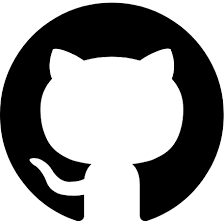

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_data = pd.read_csv('Cleveland_heart.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Age:

In [6]:
print("Min Age: ", min(heart_data.age))
print("Max Age: ", max(heart_data.age))
print("Mean Age: ", heart_data.age.mean())

Min Age:  29
Max Age:  77
Mean Age:  54.366336633663366


Text(0.5, 1.0, 'Age Distribution in Data')

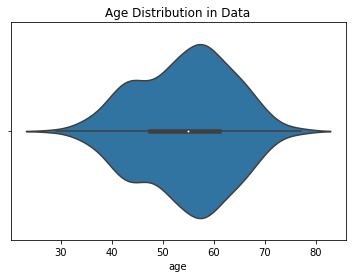

In [7]:
# Lets first show a distribution of the Age in the Data: 
sns.violinplot(heart_data.age)
plt.title("Age Distribution in Data")

First thing we are going to do is divide the age into groups: 
* Young People = young_pp (Age: 29-42)
* Middle Aged People = middle_pp (Age: 43-56)
* Old People = old_pp (Age: 57-77)

In [8]:
young_pp = heart_data[(heart_data.age >= 29) & (heart_data.age <43)]
middle_pp = heart_data[(heart_data.age >= 43) & (heart_data.age <57)]
old_pp = heart_data[(heart_data.age > 57)]

print('Young People: ', len(young_pp))
print('Middle People: ', len(middle_pp))
print('Old People: ', len(old_pp))

Young People:  37
Middle People:  126
Old People:  123


In [9]:
# We are now creating a new column in the data with the different Age Groups:
heart_data['AgeGroups']=0
young_pp_index=heart_data[(heart_data.age>=29)&(heart_data.age<43)].index
middle_pp_index=heart_data[(heart_data.age>=43)&(heart_data.age<57)].index
elderly_pp_index=heart_data[(heart_data.age>57)].index

for index in young_pp_index: 
    heart_data.loc[index, 'AgeGroups'] = 0
for index in middle_pp_index:
    heart_data.loc[index, 'AgeGroups'] = 1
for index in elderly_pp_index: 
    heart_data.loc[index, 'AgeGroups'] = 2


In [10]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeGroups
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


Text(0.5, 1.0, 'Sex Representation in Age Groups')

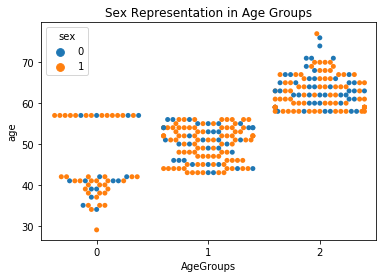

In [11]:
# Now lets spread out the data and show how the Age Groups are distributed and What Sex they represent: 
sns.swarmplot(x = 'AgeGroups', y = 'age', hue = 'sex', data = heart_data)
plt.title("Sex Representation in Age Groups")

Text(0.5, 1, 'Age & Heart Condition Relationship')

<Figure size 1800x2160 with 0 Axes>

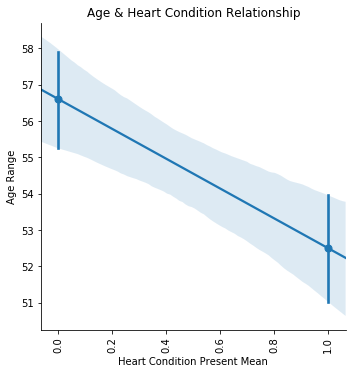

In [35]:
# Now lets see the Age correlation with Target: 
plt.figure(figsize = (25, 30))
sns.lmplot(x = 'target', y = 'age', data = heart_data,  x_estimator = np.mean )
plt.xticks(rotation = 90)
plt.xlabel('Heart Condition Present Mean')
plt.ylabel('Age Range')
plt.title('Age & Heart Condition Relationship')

Text(0.5, 1.0, 'Heart Condition Representation by Age')

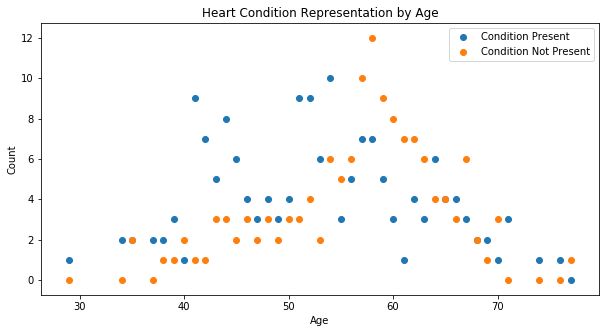

In [37]:
# Now Lets determine the age range of patients with and without a Heart Condition Present: 
age_condition_yes = []
age_condition_no = []

for i in heart_data.age.unique():
    age_condition_yes.append(len(heart_data[(heart_data.age == i) & (heart_data.target == 1)]))
    age_condition_no.append(len(heart_data[(heart_data.age == i) & (heart_data.target == 0)]))

#Plot: 
plt.figure(figsize =(10,5))
plt.scatter(x = heart_data.age.unique(), y = age_condition_yes, label = 'Condition Present')
plt.scatter(x = heart_data.age.unique(), y = age_condition_no, label = 'Condition Not Present')
plt.legend(loc = 'upper right', frameon = True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Heart Condition Representation by Age')

## Sex: 
**Remember**: 
* 1 = Male
* 0 = Female

In [24]:
heart_data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

Now lets see how the sex correlates with wether or not there is a heart condition present (target): 

Text(0.5, 1.0, 'Female Condition Present')

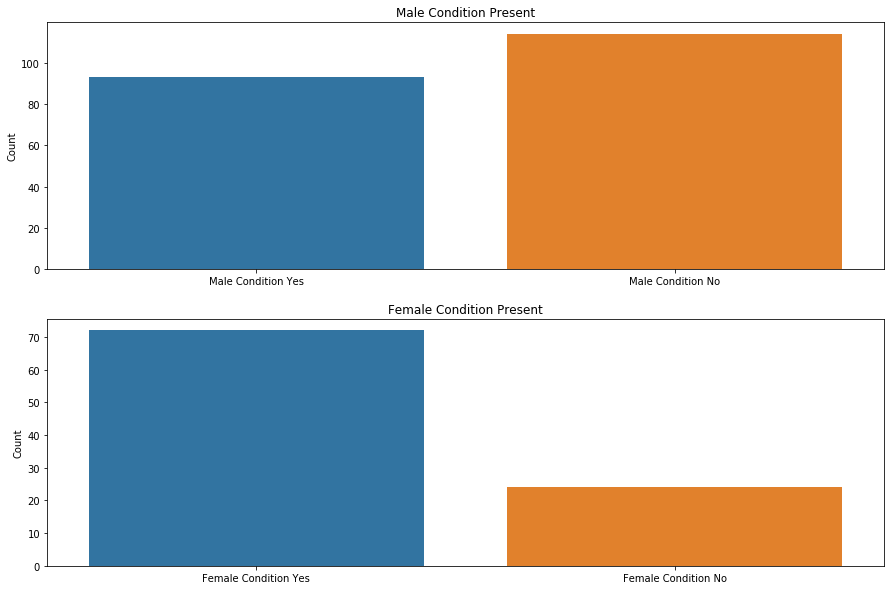

In [27]:
# Male & Female Heart Condition Present: 
male_condition_yes = len(heart_data[(heart_data.sex == 1) & (heart_data.target == 1)]) 
male_condition_no = len(heart_data[(heart_data.sex == 1) & (heart_data.target == 0)])

female_condition_yes = len(heart_data[(heart_data.sex == 0) & (heart_data.target == 1)])
female_condition_no = len(heart_data[(heart_data.sex ==0) & (heart_data.target == 0 )])

# Plot:

plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
sns.barplot(x = ['Male Condition Yes', 'Male Condition No'], y = [male_condition_yes, male_condition_no])
plt.ylabel('Count')
plt.title('Male Condition Present')
plt.subplot(2,1,2)
sns.barplot(x = ['Female Condition Yes', 'Female Condition No'], y = [female_condition_yes, female_condition_no])
plt.ylabel('Count')
plt.title('Female Condition Present')

In [32]:
# Now lets see a percentage representation of the graphs above: 
genders = len(heart_data.sex)
male = len(heart_data[heart_data.sex == 1])
female = len(heart_data[heart_data.sex == 0 ])
print('Male with Heart Condition: {:.2f}%'.format((male_condition_yes/(male) * 100)))
print('Male without Heart Condition: {:.2f}%'.format((male_condition_no/(male) * 100)))
print()
print('Female with Heart Condition: {:.2f}%'.format((female_condition_yes/(female) * 100)))
print('Female Without Heart Condition: {:.2f}%'.format((female_condition_no/(female) * 100)))

Male with Heart Condition: 44.93%
Male without Heart Condition: 55.07%

Female with Heart Condition: 75.00%
Female Without Heart Condition: 25.00%


## Chest Pain 

In [38]:
heart_data.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0, 0.5, 'Count')

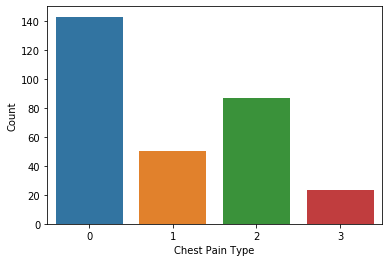

In [40]:
# Lets now plot the value counts of Chest Pain Types: 
sns.countplot(heart_data.cp)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

Text(0.5, 1.0, 'Chest Pain Type 3 vs Heart Condition Present Count')

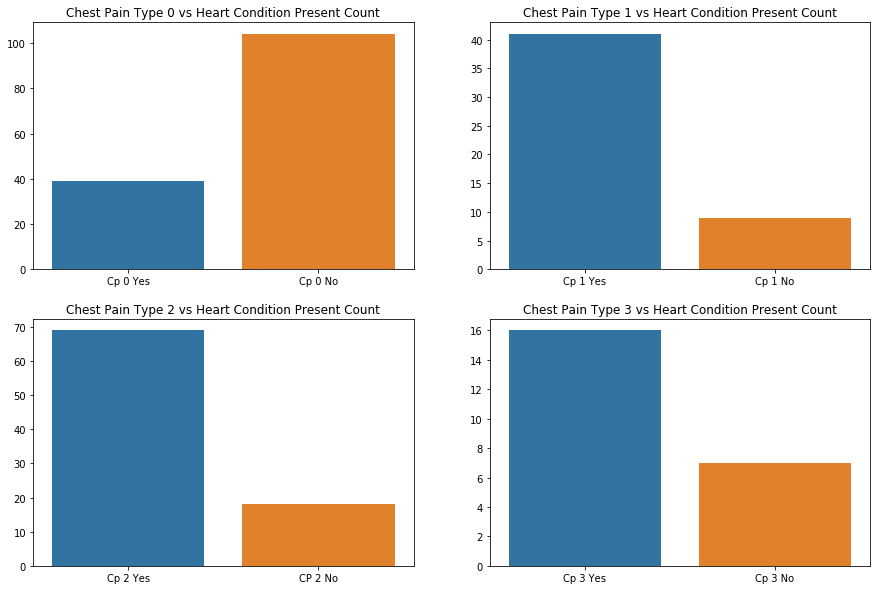

In [45]:
# Now lets find the relationship between chest pain and Heart Condition Presents: 
cp0_yes = len(heart_data[(heart_data.cp == 0) & (heart_data.target == 1)])
cp0_no = len(heart_data[(heart_data.cp == 0) & (heart_data.target == 0 )])
cp1_yes = len(heart_data[(heart_data.cp == 1) & (heart_data.target == 1)])
cp1_no = len(heart_data[(heart_data.cp == 1) & (heart_data.target == 0)])
cp2_yes = len(heart_data[(heart_data.cp == 2) & (heart_data.target == 1)])
cp2_no = len(heart_data[(heart_data.cp == 2) & (heart_data.target == 0)])
cp3_yes = len(heart_data[(heart_data.cp == 3) & (heart_data.target == 1)])
cp3_no = len(heart_data[(heart_data.cp == 3) & (heart_data.target == 0)])

# Plot: 
plt.figure(figsize = (15,10))
plt.subplot(2, 2, 1)
sns.barplot(x = ['Cp 0 Yes', 'Cp 0 No'], y = [cp0_yes, cp0_no])
plt.title('Chest Pain Type 0 vs Heart Condition Present Count')
plt.subplot(2, 2, 2)
sns.barplot(x = ['Cp 1 Yes', 'Cp 1 No'], y = [cp1_yes, cp1_no])
plt.title('Chest Pain Type 1 vs Heart Condition Present Count')
plt.subplot(2,2,3)
sns.barplot(x = ['Cp 2 Yes', 'CP 2 No'], y = [cp2_yes, cp2_no])
plt.title('Chest Pain Type 2 vs Heart Condition Present Count')
plt.subplot(2,2,4)
sns.barplot(x = ['Cp 3 Yes', 'Cp 3 No'], y = [cp3_yes, cp3_no])

plt.title('Chest Pain Type 3 vs Heart Condition Present Count')

## Here is a wide analysis of every feature in the data: 



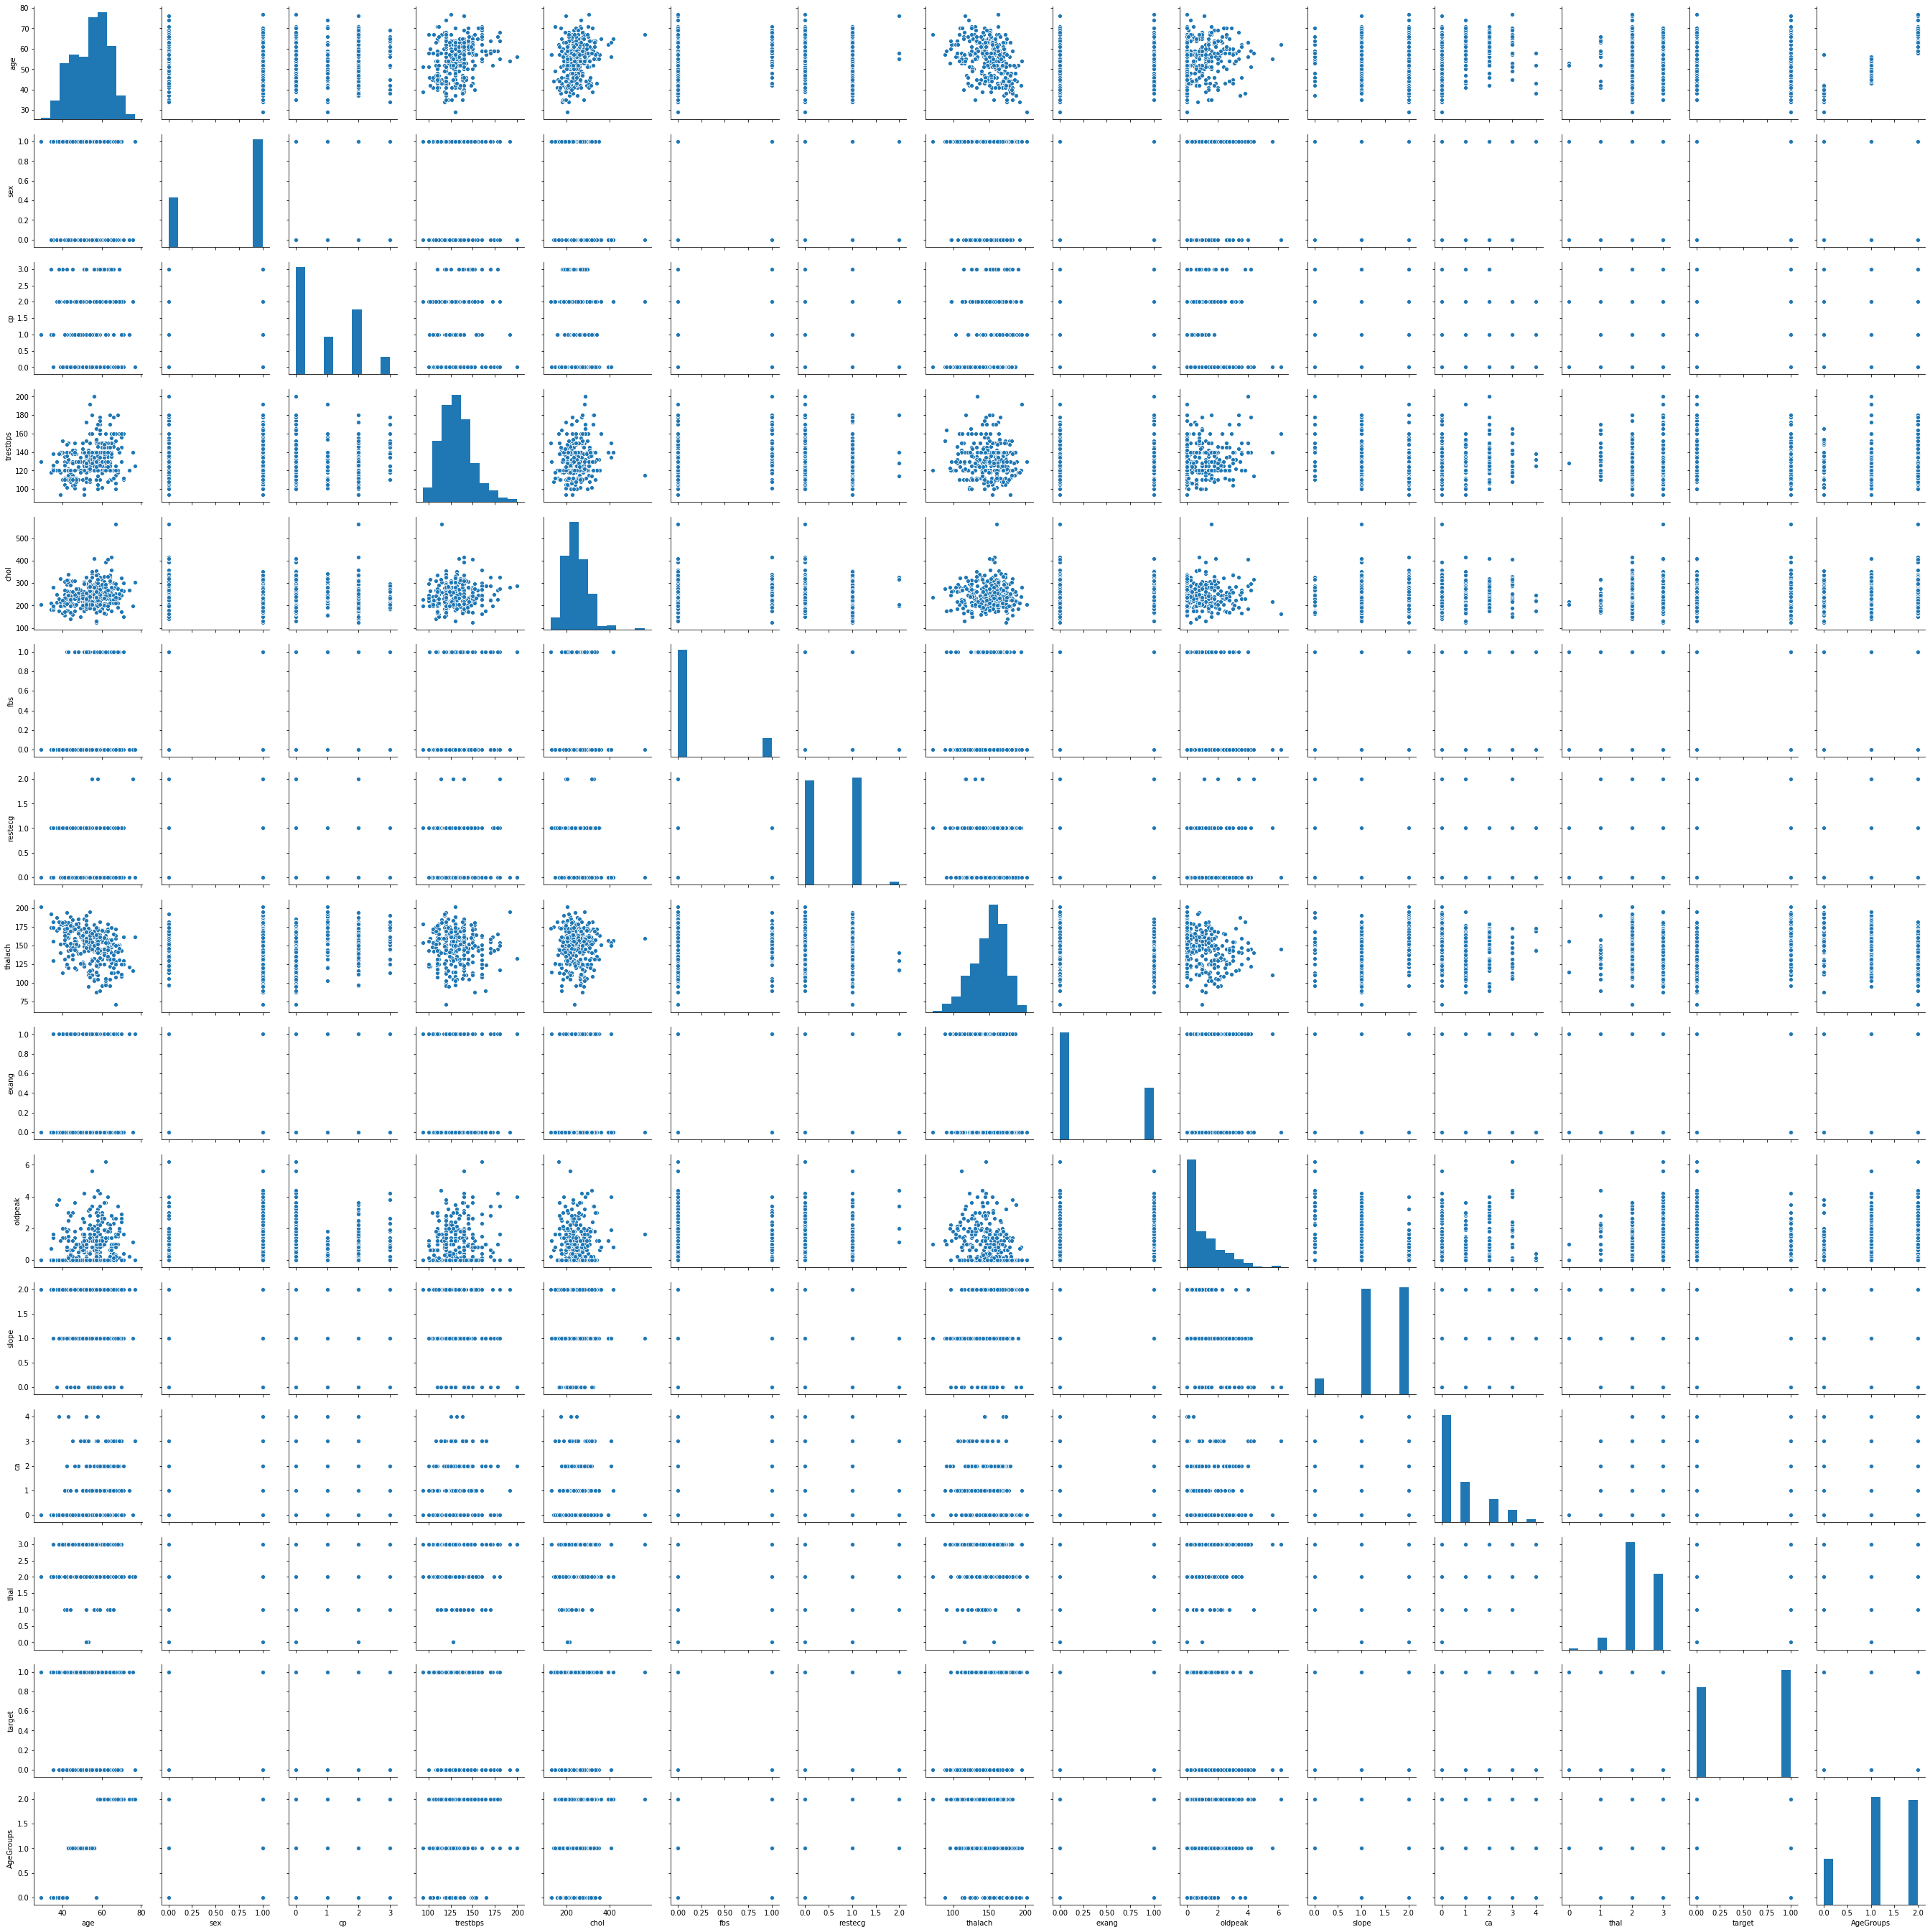

In [46]:
sns.pairplot(heart_data)
plt.show()

## Predictive Analytics Models

For my predictive models I decided to use DeicionTreeClassifier and RandomForestClassifier

* DecisionTreeClassifier: 
    * This is a function that is capable of perfomring multi-class classification on a dataset. 
    * It takes as input a Matrix (X) and a series y.  
    * Once the model has been fitted, it can then be used to predict the class of samples. 
    * DecisionTreeClassifier is capable of both: binary classification and multiclass label classification. \[5\]
* RandomForestClassfier: 
    * This model is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the datset and uses veraging to improve the predicitive accuracy and control over-fitting.  \[6\]

First thing we are going to do is create the Test and Train data. This is going to be done in this order: 
1. Remove the target column from the data and make it a dataframe by it self. 
2. We are then going to create: X_train, X_test, y_train, y_test.  This is going to be done by using the sklearn function train_test_split
3. Finally we are going to Normalize X_train & X_test.
    * This is done in order to structure the data in accordance to normal forms to reduce data redundancy and improve the integrity of the data. 

In [59]:
heart_dataX = heart_data.drop('target', axis = 1)
heart_datay = heart_data['target']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(heart_dataX, heart_datay, test_size = 0.2, random_state = 2)
# test_size is asking what percentag of the data do you want to convert to test data? In here I am using 20% of the full data
# as test data. 

In [61]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (242, 14)
X_test (61, 14)
y_train (242,)
y_test (61,)


**Normalize**: 
* The function to normalize is: 
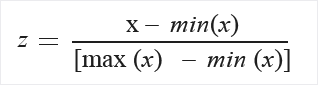

In [62]:
X_train = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train)).values
X_test = (X_test - np.min(X_test))/(np.max(X_test) - np.min(X_test)).values

### Decision Tree Classifier: 


In [70]:
for j in range(2, 15):
    dt = DecisionTreeClassifier(max_leaf_nodes = j, random_state = 1, max_depth = 7,
                               min_samples_split = 3)
    dt.fit(X_train, y_train)
    print('TEST set score w/' +str(j)+ ' max_leaf_nodes: {:.7}'.format(dt.score(X_test, y_test)))

TEST set score w/2 max_leaf_nodes: 0.8196721
TEST set score w/3 max_leaf_nodes: 0.7377049
TEST set score w/4 max_leaf_nodes: 0.8360656
TEST set score w/5 max_leaf_nodes: 0.8360656
TEST set score w/6 max_leaf_nodes: 0.8032787
TEST set score w/7 max_leaf_nodes: 0.8032787
TEST set score w/8 max_leaf_nodes: 0.8196721
TEST set score w/9 max_leaf_nodes: 0.8032787
TEST set score w/10 max_leaf_nodes: 0.8032787
TEST set score w/11 max_leaf_nodes: 0.8032787
TEST set score w/12 max_leaf_nodes: 0.8032787
TEST set score w/13 max_leaf_nodes: 0.8032787
TEST set score w/14 max_leaf_nodes: 0.8032787


From this we now know that the best results re emerging when the model is restricted to a max_leaf_nodes of 4 or 5.  

In [72]:
dtc = DecisionTreeClassifier(max_depth = 7, min_samples_split = 3,
                             random_state = 1, max_leaf_nodes = 4)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_proba = dtc.predict_proba(X_test)

from sklearn.metrics import r2_score, accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('DecisionTreeClassifier Train Score: ', format(dtc.score(X_train, y_train)))
print('DecisionTreeClassifier Test Score: ', format(dtc.score(X_test, y_test)))
print()



Accuracy:  0.8360655737704918
DecisionTreeClassifier Train Score:  0.8223140495867769
DecisionTreeClassifier Test Score:  0.8360655737704918



We are know going to implement a confusion Matrix: 
* Cunfusion Matrix is: 
    * A table used to describe performance of classification model on a test data: \[7\]
    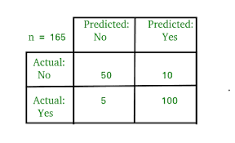

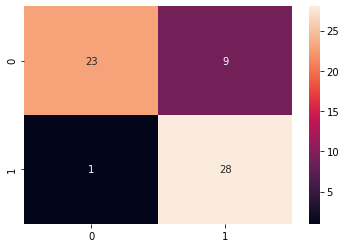

In [74]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

From these results we can see that our model is actually pretty solid.  It had an accuracy of 84% and a Train Score of 84% as well. 
* The confusion Matrix Showed that: 
    * True Negative: 23
    * False Negative: 9
    * True Positive: 28
    * False Positive: 1
    

Text(0.5, 1.0, 'Feature Importance for DTC')

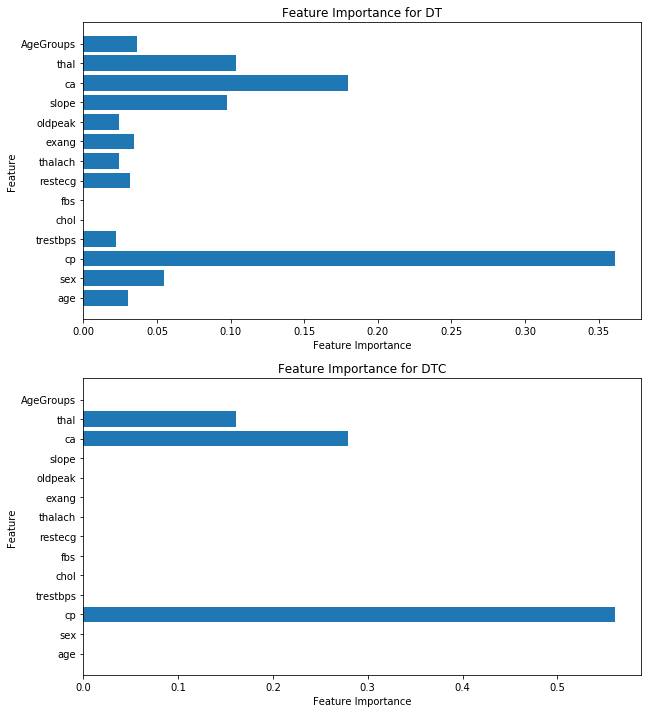

In [77]:
# Now we are going to show how every feature was weighted through the model. Or in other words the importance of each feature
# to reach a conclusion: 

def plot_feature_importances(dt):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), dt.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    
plt.figure(figsize = (10, 12))
plt.subplot(2,1,1)
plot_feature_importances(dt) 
plt.title("Feature Importance for DT")
plt.subplot(2,1,2)
plot_feature_importances(dtc)
plt.title("Feature Importance for DTC")

From this graph we can see that for the Decision Tree Classifier the most imporant features were: 
* DT:
    * Chest Pain 
    * Ca
    * Thal
* DTC: 
    * Chest Pain
    * Ca
    * Thal



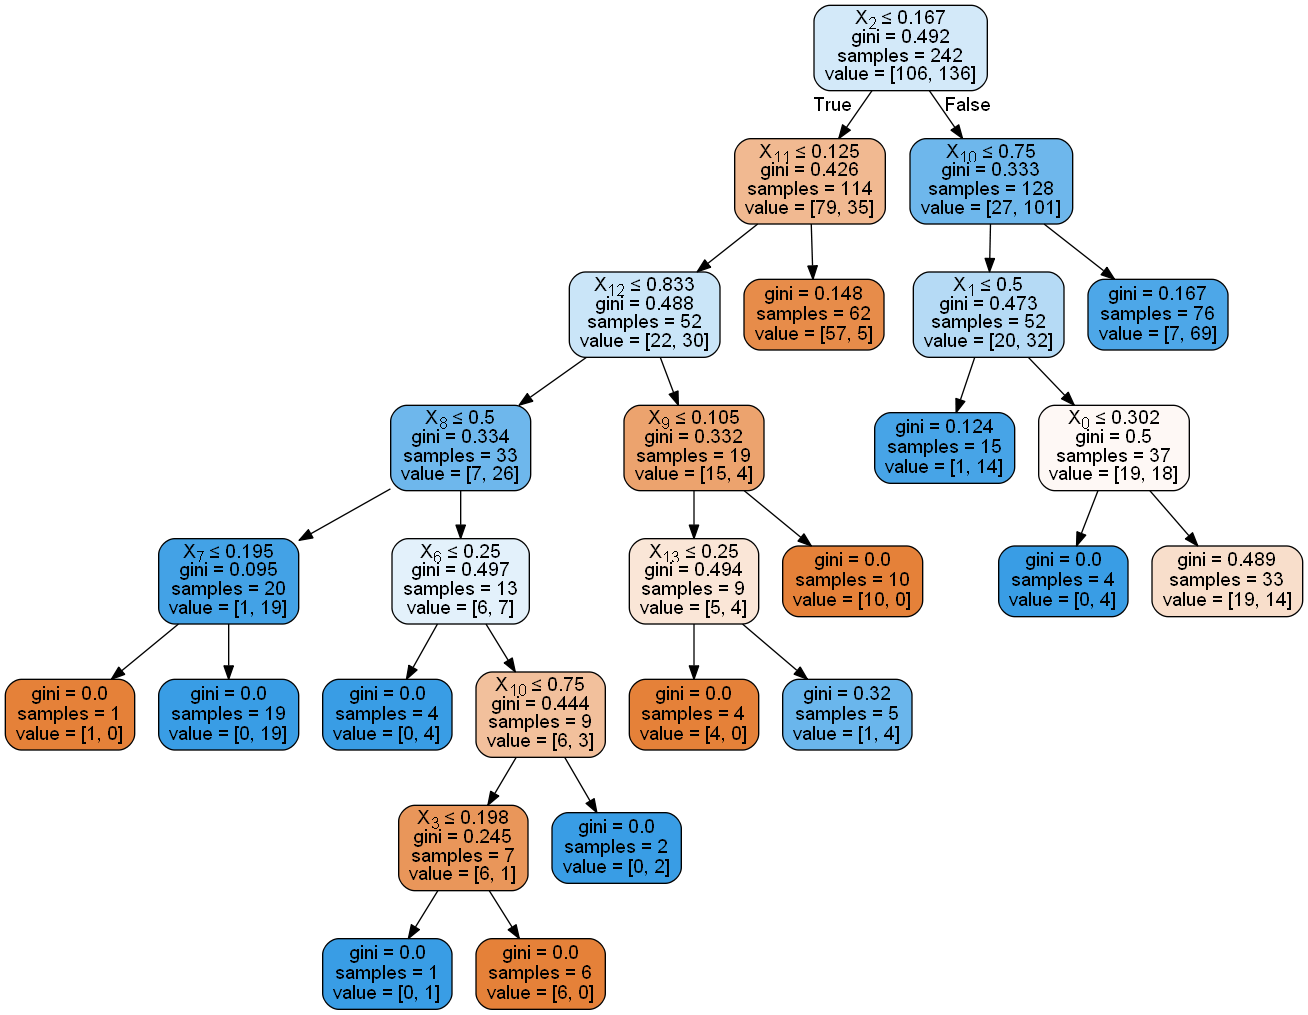

In [79]:
# Now lets have a visual representation of the Decision Tree Classifier:

dot_data = StringIO()

export_graphviz(dt, out_file = dot_data, filled = True, rounded = True, 
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

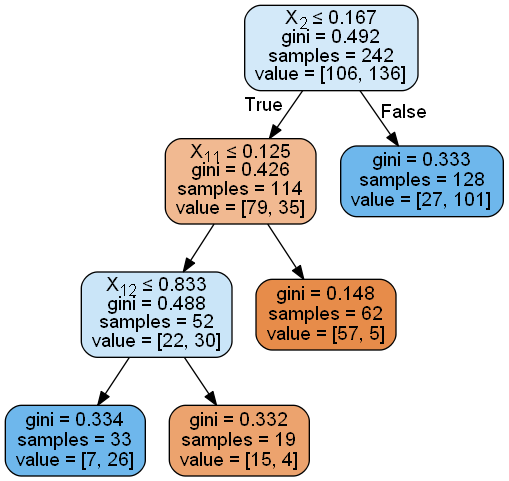

In [80]:
dot_data = StringIO()

export_graphviz(dtc, out_file = dot_data, filled = True, rounded = True, 
               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### Random Forest Classifier: 
Lets now compare the results of DecisionTreeClassifier with the ones from RandomForestClassifer:

In [81]:
for i in range(1,15): 
    rf = RandomForestClassifier (n_estimators = i, random_state = 3, max_depth = 7)
    rf.fit(X_train, y_train)
    print('Test set score w/' +str(i)+' estimators: {:.4}'.format(rf.score(X_test,
                                                                        y_test)))

Test set score w/1 estimators: 0.8361
Test set score w/2 estimators: 0.8361
Test set score w/3 estimators: 0.8689
Test set score w/4 estimators: 0.8852
Test set score w/5 estimators: 0.918
Test set score w/6 estimators: 0.8689
Test set score w/7 estimators: 0.8197
Test set score w/8 estimators: 0.8361
Test set score w/9 estimators: 0.8852
Test set score w/10 estimators: 0.8525
Test set score w/11 estimators: 0.8361
Test set score w/12 estimators: 0.8525
Test set score w/13 estimators: 0.8197
Test set score w/14 estimators: 0.8525


The best results were obtained with a value of n_estimators = 5

In [82]:
rfc = RandomForestClassifier(max_depth = 7, min_samples_split = 4, n_estimators = 5,
                            random_state = 3)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

y_proba = rfc.predict_proba(X_test)

Accuracy Score: 0.8524590163934426
RandomForestClassifier Train Score: 0.9380165289256198
RandomForestClassifier Test Score: 0.8524590163934426



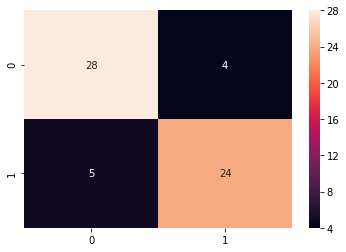

In [83]:
print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('RandomForestClassifier Train Score:', format(rfc.score(X_train, y_train)))
print('RandomForestClassifier Test Score:', format(rfc.score(X_test, y_test)))
print()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

This mode had an accuracy of 85.2%, a Train Score of 93.8%, and a test score of 85.2%. These results surpass the results of the Decision Tree Classifier, but it can be seen in the confusion matrix that the Decision Tree was better at identifyin True Positives than this model. This model was better at identifying True Negatives. 
* The confusion Matrix Showed that: 
    * True Negative: 28
    * False Negative: 4
    * True Positive: 24
    * False Positive: 5

Text(0.5, 1.0, 'Feature Importance for RFC')

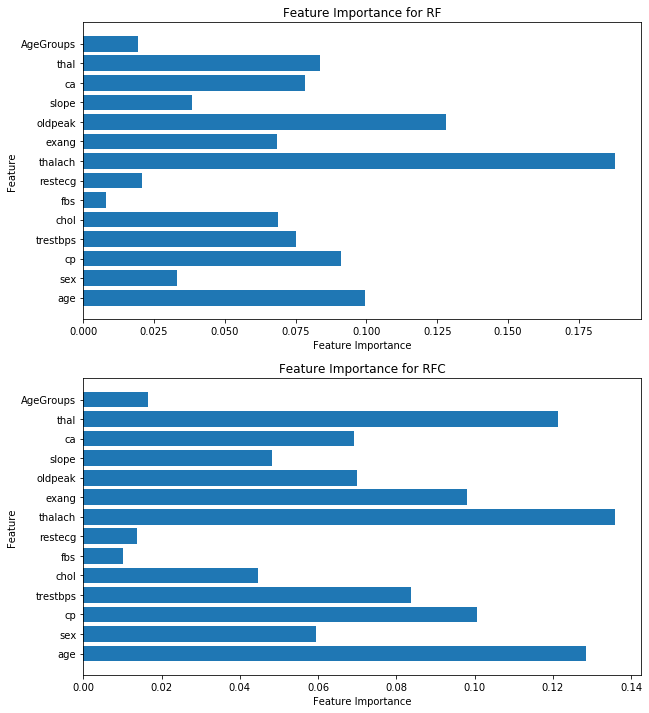

In [84]:
plt.figure(figsize = (10, 12))
plt.subplot(2,1,1)
plot_feature_importances(rf)
plt.title('Feature Importance for RF')
plt.subplot(2,1,2)
plot_feature_importances(rfc)
plt.title('Feature Importance for RFC')

From this graph we can see that for the Random Forrest Classifier the most imporant features were: 
* RF:
    * Thalach 
    * Oldpeak
    * Age
* DTC: 
    * Thalach
    * Age
    * Thal
    * CP

## Discussion: 

#### Surprise in the Features Utilized: 
When I saw what features were utilized in the DecisionTreeClassifier Mdoel I was actually very surprised.  I thought that Age and Sex were going to be big factors in the final result, but they had an extremely minimall importnace as a feature. In the DTC model they had an importance of 0. This was extremely surprising to me.  Another surprise I had was the major difference in feature importance between models.  RandomForestClassifier is based on DecisionTreeClassifiers, so my initial thought was that maybe the same featuers were going to have a similar importance, but this was not the case.  In the RandomForrest Model Age and Sex had significantly more importance than in the DecisionTree Models

## Refernces: 

\[1\] https://pandas.pydata.org/

\[2\] https://numpy.org

\[3\] https://matplotlib.org

\[4\] https://scikit-learn.org/stable/

\[5\] https://scikit-learn.org/stable/modules/tree.html#tree

\[6\] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

\[7\] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

\[8\] https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

\[9\] https://seaborn.pydata.org/

\[10\] https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176

\[11\] https://stats.stackexchange.com/questions/70801/how-to-normalize-data-to-0-1-range

\[12\] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html